In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(
    "COVID-19_Case_Surveillance_Public_Use_Data.csv", 
    usecols=['current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'], 
    dtype={'current_status': 'string', 'sex': 'string', 'age_group': 'string', 'race_ethnicity_combined': 'string', 'hosp_yn': 'string', 'icu_yn': 'string', 'death_yn': 'string', 'medcond_yn': 'string'},
    na_values=['Missing', 'Unknown'])
data

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Female,0 - 9 Years,<NA>,<NA>,<NA>,No,<NA>
1,Laboratory-confirmed case,Male,0 - 9 Years,<NA>,<NA>,<NA>,No,<NA>
2,Laboratory-confirmed case,Male,0 - 9 Years,<NA>,<NA>,<NA>,No,<NA>
3,Laboratory-confirmed case,Male,0 - 9 Years,<NA>,<NA>,<NA>,No,<NA>
4,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,<NA>,No,Yes
...,...,...,...,...,...,...,...,...
20565340,Laboratory-confirmed case,Female,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,No,<NA>
20565341,Laboratory-confirmed case,Female,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,No,No
20565342,Laboratory-confirmed case,Female,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,<NA>,<NA>,<NA>
20565343,Laboratory-confirmed case,Female,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,No,Yes


In [4]:
data['current_status'].unique()

<StringArray>
['Laboratory-confirmed case', 'Probable Case']
Length: 2, dtype: string

In [5]:
data['age_group'].unique()

<StringArray>
[  '0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '60 - 69 Years',
 '70 - 79 Years', '40 - 49 Years', '50 - 59 Years',     '80+ Years',
 '30 - 39 Years',            <NA>]
Length: 10, dtype: string

In [6]:
data['death_yn'].unique()

<StringArray>
['No', <NA>, 'Yes']
Length: 3, dtype: string

In [7]:
data['race_ethnicity_combined'].unique()

<StringArray>
[                                                  <NA>,
                                  'White, Non-Hispanic',
                                  'Black, Non-Hispanic',
                                      'Hispanic/Latino',
                         'Multiple/Other, Non-Hispanic',
                                  'Asian, Non-Hispanic',
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
          'American Indian/Alaska Native, Non-Hispanic']
Length: 8, dtype: string

In [8]:
data['sex'].unique()

<StringArray>
['Female', 'Male', <NA>, 'Other']
Length: 4, dtype: string

In [3]:
by_age_race = (data
               .groupby(['death_yn', 'age_group', 'race_ethnicity_combined'], dropna=False)
               .size()
               .to_frame('size')
               .reset_index())
by_age_race

,death_yn,age_group,race_ethnicity_combined,size
0,No,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",3840
1,No,0 - 9 Years,"Asian, Non-Hispanic",12244
2,No,0 - 9 Years,"Black, Non-Hispanic",36916
3,No,0 - 9 Years,Hispanic/Latino,61681
4,No,0 - 9 Years,"Multiple/Other, Non-Hispanic",33603
...,...,...,...,...
230,<NA>,<NA>,Hispanic/Latino,1693
231,<NA>,<NA>,"Multiple/Other, Non-Hispanic",4034
232,<NA>,<NA>,"Native Hawaiian/Other Pacific Islander, Non-Hi...",52
233,<NA>,<NA>,"White, Non-Hispanic",40331


In [6]:
death_by_age_race = by_age_race[by_age_race['death_yn'] == 'Yes'][['age_group', 'race_ethnicity_combined', 'size']]
death_by_age_race

,age_group,race_ethnicity_combined,size
80,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",2
81,0 - 9 Years,"Black, Non-Hispanic",21
82,0 - 9 Years,Hispanic/Latino,29
83,0 - 9 Years,"Multiple/Other, Non-Hispanic",6
84,0 - 9 Years,"White, Non-Hispanic",44
...,...,...,...
150,<NA>,"Black, Non-Hispanic",3
151,<NA>,Hispanic/Latino,2
152,<NA>,"Native Hawaiian/Other Pacific Islander, Non-Hi...",1
153,<NA>,"White, Non-Hispanic",11


In [7]:
cases_by_age_race = (by_age_race
    .groupby(['age_group', 'race_ethnicity_combined'], dropna=False)
    .sum()
    .reset_index())
cases_by_age_race

,age_group,race_ethnicity_combined,size
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",8926
1,0 - 9 Years,"Asian, Non-Hispanic",19152
2,0 - 9 Years,"Black, Non-Hispanic",64642
3,0 - 9 Years,Hispanic/Latino,136842
4,0 - 9 Years,"Multiple/Other, Non-Hispanic",46751
...,...,...,...
75,NaN,Hispanic/Latino,1916
76,NaN,"Multiple/Other, Non-Hispanic",4937
77,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",66
78,NaN,"White, Non-Hispanic",43405


In [12]:
# 20,565,345
by_age_race['size'].sum()

20565345

In [13]:
total_cases = cases_by_age_race['size'].sum()
total_cases

20565345

In [14]:
total_deaths = death_by_age_race['size'].sum()
total_deaths

372578

In [15]:
100 * total_deaths / total_cases

1.8116788218238011

In [8]:
all_by_age_race = cases_by_age_race.merge(
    death_by_age_race,
    on=['age_group', 'race_ethnicity_combined'],
    suffixes=('_cases', '_deaths')
)
all_by_age_race.columns = ['age_group', 'race_ethnicity', 'cases', 'deaths']
all_by_age_race['prob_death'] = all_by_age_race['deaths'] / (all_by_age_race['cases'] * 4.6)
all_by_age_race

,age_group,race_ethnicity,cases,deaths,prob_death
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",8926,2,0.000049
1,0 - 9 Years,"Black, Non-Hispanic",64642,21,0.000071
2,0 - 9 Years,Hispanic/Latino,136842,29,0.000046
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",46751,6,0.000028
4,0 - 9 Years,"White, Non-Hispanic",221859,44,0.000043
...,...,...,...,...,...
70,NaN,"Black, Non-Hispanic",14580,3,0.000045
71,NaN,Hispanic/Latino,1916,2,0.000227
72,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",66,1,0.003294
73,NaN,"White, Non-Hispanic",43405,11,0.000055


In [20]:
all_by_age_race = pd.read_csv("all_by_age_race.csv").drop(columns="Unnamed: 0").dropna()
all_by_age_race

,age_group,race_ethnicity,cases,deaths,prob_death,prob_death_full,prob_death_middle,odds_full,odds_middle
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",8926,2,0.000049,1.240063e-08,7.583634e-09,"1 in 80,641,054","1 in 131,862,905"
1,0 - 9 Years,"Black, Non-Hispanic",64642,21,0.000071,1.797940e-08,1.099534e-08,"1 in 55,619,208","1 in 90,947,600"
2,0 - 9 Years,Hispanic/Latino,136842,29,0.000046,1.172868e-08,7.172703e-09,"1 in 85,261,060","1 in 139,417,461"
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",46751,6,0.000028,7.102824e-09,4.343748e-09,"1 in 140,789,078","1 in 230,215,949"
4,0 - 9 Years,"White, Non-Hispanic",221859,44,0.000043,1.097606e-08,6.712432e-09,"1 in 91,107,407","1 in 148,977,310"
...,...,...,...,...,...,...,...,...,...
64,80+ Years,"Black, Non-Hispanic",49054,13183,0.058423,1.487341e-05,9.095866e-06,"1 in 67,234","1 in 109,940"
65,80+ Years,Hispanic/Latino,38416,9838,0.055672,1.417312e-05,8.667601e-06,"1 in 70,556","1 in 115,372"
66,80+ Years,"Multiple/Other, Non-Hispanic",30084,6323,0.045691,1.163210e-05,7.113639e-06,"1 in 85,969","1 in 140,575"
67,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",593,136,0.049857,1.269273e-05,7.762265e-06,"1 in 78,785","1 in 128,828"


In [22]:
print(all_by_age_race[['age_group', 'race_ethnicity', 'prob_death_full', 'prob_death_middle']].to_markdown(tablefmt="github", index=False))

| age_group     | race_ethnicity                                       |   prob_death_full |   prob_death_middle |
|---------------|------------------------------------------------------|-------------------|---------------------|
| 0 - 9 Years   | American Indian/Alaska Native, Non-Hispanic          |       1.24006e-08 |         7.58363e-09 |
| 0 - 9 Years   | Black, Non-Hispanic                                  |       1.79794e-08 |         1.09953e-08 |
| 0 - 9 Years   | Hispanic/Latino                                      |       1.17287e-08 |         7.1727e-09  |
| 0 - 9 Years   | Multiple/Other, Non-Hispanic                         |       7.10282e-09 |         4.34375e-09 |
| 0 - 9 Years   | White, Non-Hispanic                                  |       1.09761e-08 |         6.71243e-09 |
| 10 - 19 Years | American Indian/Alaska Native, Non-Hispanic          |       1.1813e-08  |         7.22428e-09 |
| 10 - 19 Years | Asian, Non-Hispanic                                  |       1

In [23]:
print(all_by_age_race[['age_group', 'race_ethnicity', 'odds_full', 'odds_middle']].to_markdown(tablefmt="github", index=False))

| age_group     | race_ethnicity                                       | odds_full        | odds_middle      |
|---------------|------------------------------------------------------|------------------|------------------|
| 0 - 9 Years   | American Indian/Alaska Native, Non-Hispanic          | 1 in 80,641,054  | 1 in 131,862,905 |
| 0 - 9 Years   | Black, Non-Hispanic                                  | 1 in 55,619,208  | 1 in 90,947,600  |
| 0 - 9 Years   | Hispanic/Latino                                      | 1 in 85,261,060  | 1 in 139,417,461 |
| 0 - 9 Years   | Multiple/Other, Non-Hispanic                         | 1 in 140,789,078 | 1 in 230,215,949 |
| 0 - 9 Years   | White, Non-Hispanic                                  | 1 in 91,107,407  | 1 in 148,977,310 |
| 10 - 19 Years | American Indian/Alaska Native, Non-Hispanic          | 1 in 84,652,328  | 1 in 138,422,073 |
| 10 - 19 Years | Asian, Non-Hispanic                                  | 1 in 71,739,159  | 1 in 117,306,675 |
|

In [17]:
infection_risk = pd.read_csv("flight_infection_risk.csv")
infection_risk

,seat,full_flight,middle_empty
0,Window (A/F),0.001770,0.001087
1,Middle (B/E),0.002062,NaN
2,Aisle (C/F),0.002217,0.001377
3,Any seat,0.000255,0.000156


In [18]:
prob_infection_full = infection_risk.at[3, "full_flight"]
prob_infection_full

0.000254582484725

In [19]:
prob_infection_middle = infection_risk.at[3, "middle_empty"]
prob_infection_middle

0.0001556904873112

In [20]:
all_by_age_race['prob_death_full'] = all_by_age_race['prob_death'] * prob_infection_full
all_by_age_race['prob_death_middle'] = all_by_age_race['prob_death'] * prob_infection_middle
all_by_age_race

,age_group,race_ethnicity,cases,deaths,prob_death,prob_death_full,prob_death_middle
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",8926,2,0.000049,1.240063e-08,7.583634e-09
1,0 - 9 Years,"Black, Non-Hispanic",64642,21,0.000071,1.797940e-08,1.099534e-08
2,0 - 9 Years,Hispanic/Latino,136842,29,0.000046,1.172868e-08,7.172703e-09
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",46751,6,0.000028,7.102824e-09,4.343748e-09
4,0 - 9 Years,"White, Non-Hispanic",221859,44,0.000043,1.097606e-08,6.712432e-09
...,...,...,...,...,...,...,...
70,NaN,"Black, Non-Hispanic",14580,3,0.000045,1.138766e-08,6.964148e-09
71,NaN,Hispanic/Latino,1916,2,0.000227,5.777037e-08,3.532960e-08
72,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",66,1,0.003294,8.385457e-07,5.128145e-07
73,NaN,"White, Non-Hispanic",43405,11,0.000055,1.402567e-08,8.577430e-09


In [21]:
all_by_age_race['odds_full'] = (1 / all_by_age_race['prob_death_full']).map('1 in {:,.0f}'.format)
all_by_age_race['odds_middle'] = (1 / all_by_age_race['prob_death_middle']).map('1 in {:,.0f}'.format)
all_by_age_race

,age_group,race_ethnicity,cases,deaths,prob_death,prob_death_full,prob_death_middle,odds_full,odds_middle
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",8926,2,0.000049,1.240063e-08,7.583634e-09,"1 in 80,641,054","1 in 131,862,905"
1,0 - 9 Years,"Black, Non-Hispanic",64642,21,0.000071,1.797940e-08,1.099534e-08,"1 in 55,619,208","1 in 90,947,600"
2,0 - 9 Years,Hispanic/Latino,136842,29,0.000046,1.172868e-08,7.172703e-09,"1 in 85,261,060","1 in 139,417,461"
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",46751,6,0.000028,7.102824e-09,4.343748e-09,"1 in 140,789,078","1 in 230,215,949"
4,0 - 9 Years,"White, Non-Hispanic",221859,44,0.000043,1.097606e-08,6.712432e-09,"1 in 91,107,407","1 in 148,977,310"
...,...,...,...,...,...,...,...,...,...
70,NaN,"Black, Non-Hispanic",14580,3,0.000045,1.138766e-08,6.964148e-09,"1 in 87,814,368","1 in 143,592,588"
71,NaN,Hispanic/Latino,1916,2,0.000227,5.777037e-08,3.532960e-08,"1 in 17,309,910","1 in 28,304,876"
72,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",66,1,0.003294,8.385457e-07,5.128145e-07,"1 in 1,192,541","1 in 1,950,023"
73,NaN,"White, Non-Hispanic",43405,11,0.000055,1.402567e-08,8.577430e-09,"1 in 71,297,842","1 in 116,585,041"


## Output data

In [22]:
out_data = all_by_age_race[['age_group', 'race_ethnicity', 'odds_full', 'odds_middle']]
out_data

,age_group,race_ethnicity,odds_full,odds_middle
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic","1 in 80,641,054","1 in 131,862,905"
1,0 - 9 Years,"Black, Non-Hispanic","1 in 55,619,208","1 in 90,947,600"
2,0 - 9 Years,Hispanic/Latino,"1 in 85,261,060","1 in 139,417,461"
3,0 - 9 Years,"Multiple/Other, Non-Hispanic","1 in 140,789,078","1 in 230,215,949"
4,0 - 9 Years,"White, Non-Hispanic","1 in 91,107,407","1 in 148,977,310"
...,...,...,...,...
70,NaN,"Black, Non-Hispanic","1 in 87,814,368","1 in 143,592,588"
71,NaN,Hispanic/Latino,"1 in 17,309,910","1 in 28,304,876"
72,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...","1 in 1,192,541","1 in 1,950,023"
73,NaN,"White, Non-Hispanic","1 in 71,297,842","1 in 116,585,041"


In [23]:
print(out_data.to_markdown(tablefmt="github"))

|    | age_group     | race_ethnicity                                       | odds_full        | odds_middle      |
|----|---------------|------------------------------------------------------|------------------|------------------|
|  0 | 0 - 9 Years   | American Indian/Alaska Native, Non-Hispanic          | 1 in 80,641,054  | 1 in 131,862,905 |
|  1 | 0 - 9 Years   | Black, Non-Hispanic                                  | 1 in 55,619,208  | 1 in 90,947,600  |
|  2 | 0 - 9 Years   | Hispanic/Latino                                      | 1 in 85,261,060  | 1 in 139,417,461 |
|  3 | 0 - 9 Years   | Multiple/Other, Non-Hispanic                         | 1 in 140,789,078 | 1 in 230,215,949 |
|  4 | 0 - 9 Years   | White, Non-Hispanic                                  | 1 in 91,107,407  | 1 in 148,977,310 |
|  5 | 0 - 9 Years   | nan                                                  | 1 in 312,017,538 | 1 in 510,205,867 |
|  6 | 10 - 19 Years | American Indian/Alaska Native, Non-Hispanic      

In [39]:
%matplotlib inline

In [25]:
dff = (
    all_by_age_race[["age_group", "race_ethnicity", "prob_death_full", "odds_full"]]
    .copy()
    .dropna()
)
dff.columns = ["age_group", "race_ethnicity", "prob_death", "odds"]
dff["full"] = True
dff

,age_group,race_ethnicity,prob_death,odds,full
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",1.240063e-08,"1 in 80,641,054",True
1,0 - 9 Years,"Black, Non-Hispanic",1.797940e-08,"1 in 55,619,208",True
2,0 - 9 Years,Hispanic/Latino,1.172868e-08,"1 in 85,261,060",True
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",7.102824e-09,"1 in 140,789,078",True
4,0 - 9 Years,"White, Non-Hispanic",1.097606e-08,"1 in 91,107,407",True
...,...,...,...,...,...
64,80+ Years,"Black, Non-Hispanic",1.487341e-05,"1 in 67,234",True
65,80+ Years,Hispanic/Latino,1.417312e-05,"1 in 70,556",True
66,80+ Years,"Multiple/Other, Non-Hispanic",1.163210e-05,"1 in 85,969",True
67,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",1.269273e-05,"1 in 78,785",True


In [26]:
dfm = (
    all_by_age_race[["age_group", "race_ethnicity", "prob_death_middle", "odds_middle"]]
    .copy()
    .dropna()
)
dfm.columns = ["age_group", "race_ethnicity", "prob_death", "odds"]
dfm["full"] = False
dfm

,age_group,race_ethnicity,prob_death,odds,full
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",7.583634e-09,"1 in 131,862,905",False
1,0 - 9 Years,"Black, Non-Hispanic",1.099534e-08,"1 in 90,947,600",False
2,0 - 9 Years,Hispanic/Latino,7.172703e-09,"1 in 139,417,461",False
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",4.343748e-09,"1 in 230,215,949",False
4,0 - 9 Years,"White, Non-Hispanic",6.712432e-09,"1 in 148,977,310",False
...,...,...,...,...,...
64,80+ Years,"Black, Non-Hispanic",9.095866e-06,"1 in 109,940",False
65,80+ Years,Hispanic/Latino,8.667601e-06,"1 in 115,372",False
66,80+ Years,"Multiple/Other, Non-Hispanic",7.113639e-06,"1 in 140,575",False
67,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",7.762265e-06,"1 in 128,828",False


In [41]:
dfg = dff.append(dfm, ignore_index=True)
dfg

,age_group,race_ethnicity,prob_death,odds,full
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",1.240063e-08,"1 in 80,641,054",True
1,0 - 9 Years,"Black, Non-Hispanic",1.797940e-08,"1 in 55,619,208",True
2,0 - 9 Years,Hispanic/Latino,1.172868e-08,"1 in 85,261,060",True
3,0 - 9 Years,"Multiple/Other, Non-Hispanic",7.102824e-09,"1 in 140,789,078",True
4,0 - 9 Years,"White, Non-Hispanic",1.097606e-08,"1 in 91,107,407",True
...,...,...,...,...,...
117,80+ Years,"Black, Non-Hispanic",9.095866e-06,"1 in 109,940",False
118,80+ Years,Hispanic/Latino,8.667601e-06,"1 in 115,372",False
119,80+ Years,"Multiple/Other, Non-Hispanic",7.113639e-06,"1 in 140,575",False
120,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",7.762265e-06,"1 in 128,828",False


In [33]:
sns.set_theme(style="ticks")

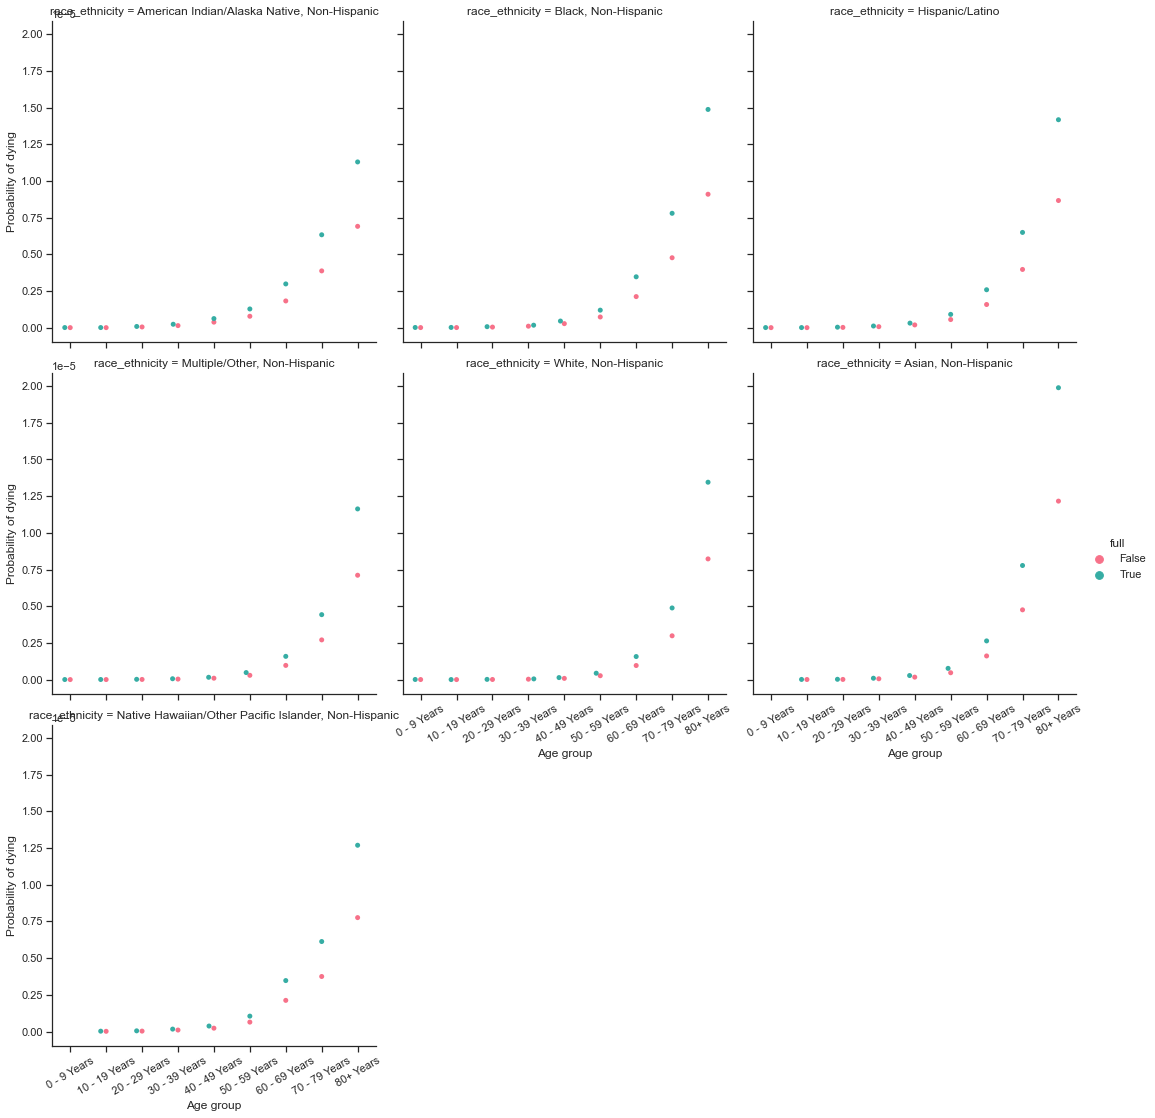

In [40]:
g = sns.catplot(
    x="age_group",
    y="prob_death",
    col="race_ethnicity",
    col_wrap=3,
    hue="full",
    marker="o",
    palette="husl",
    kind="swarm",
    data=dfg,
)
g.set_xticklabels(rotation=30)
g.set_xlabels("Age group")
g.set_ylabels("Probability of dying")